##### 10 Academy: Artificial Intelligence Mastery
##### Week 3 Challenge
##### Statistical Modeling
###### Ethel.C


In [1]:
import sys
import pandas as pd

# Add the scripts and src directories to the Python path
scripts_dir = r'E:\DS+ML\AIM3\Week3\Week3\Week3.AIM3\scripts'
src_dir = r'E:\DS+ML\AIM3\Week3\Week3\Week3.AIM3\src'
txt_file_path = r"E:\DS+ML\AIM3\Week3\Data\MachineLearningRating_v3.txt"
csv_file_path = r"E:\DS+ML\AIM3\Week3\Data\MachineLearningRating_v3.csv"
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

if src_dir not in sys.path:
    sys.path.append(src_dir)


In [2]:
from data_preprocessing import handle_missing_values, handle_outliers
from Modeling import InsuranceModeling 
from Future_Engineering import InsuranceDataUtils

In [3]:
df = pd.read_csv(csv_file_path, low_memory=False)
df = handle_missing_values(df)
df = handle_outliers(df)

Dropped columns with >50.0% or 100% missing values: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'NumberOfVehiclesInFleet']
Filled missing values: Mode for categorical, Mean/Median for numerical columns.
Capped outliers using IQR method for numerical columns.


#### Feature Engineering

Definition: Transforming raw data into meaningful features for machine learning models to improve performance.

New Features:

##### 1. Extract from Dates:
Vehicle age from RegistrationYear.
##### 2. Binning:
Convert SumInsured and CubicCapacity into categories (e.g., "Low," "Medium," "High").
##### 3. Extract from TransactionMonth:
Month, Quarter, Year for seasonality analysis.
##### 4. Log Transformation:
Apply log to skewed features like SumInsured and CalculatedPremiumPerTerm to normalize distributions.

In [9]:
utils = InsuranceDataUtils(df, target_column='TotalPremium')
utils.add_date_features()
utils.add_vehicle_age()
utils.combine_province_zone()
utils.apply_log_transformation()
# Get the new dataset with only selected features
selected_features_df = utils.get_selected_features_df()
# Get the new dataset with only selected features
selected_features_df = utils.get_selected_features_df()
# List unique values in the 'Province' column
selected_features_df.head()

       LogSumInsured  LogCapitalOutstanding
count   1.000098e+06           1.000098e+06
mean    9.194927e+00           2.550096e+00
std     3.723331e+00           5.008409e+00
min     9.950331e-03           9.999950e-06
25%     8.517393e+00           9.999950e-06
50%     8.922792e+00           9.999950e-06
75%     1.242922e+01           9.999950e-06
max     1.333344e+01           1.345884e+01


,TransactionYear,TransactionMonthOnly,VehicleAge,ProvinceZone,LogSumInsured,LogCapitalOutstanding,TotalPremium,TotalClaims
0,2015,3,20.0,Gauteng_Rand East,0.009950,11.689405,21.929825,0.0
1,2015,5,20.0,Gauteng_Rand East,0.009950,11.689405,21.929825,0.0
2,2015,7,20.0,Gauteng_Rand East,0.009950,11.689405,0.000000,0.0
3,2015,5,20.0,Gauteng_Rand East,11.689405,11.689405,54.824561,0.0
4,2015,7,20.0,Gauteng_Rand East,11.689405,11.689405,0.000000,0.0


In [10]:
# Initialize with target column for TotalPremium
encode_premium = InsuranceDataUtils(selected_features_df, target_column='TotalPremium')
encode_premium.preprocess_features()
encode_premium.split_data()
preprocessed_df = encode_premium.get_preprocessed_df()

preprocessed_df.head()
# Initialize with target column for TotalClaims
X_train_premium, X_test_premium, y_train_premium, y_test_premium = encode_premium.get_train_test_data()

Starting feature preprocessing...
Preprocessing successful.
DataFrame created successfully with shape: (1000098, 27)
Training data shape for TotalPremium: (800078, 26)
Testing data shape for TotalPremium: (200020, 26)


In [11]:
encode_claims = InsuranceDataUtils(selected_features_df, target_column='TotalClaims')
encode_claims.preprocess_features()
encode_claims.split_data()
preprocessed_df = encode_claims.get_preprocessed_df()

preprocessed_df.head()
# Print the shapes to verify
X_train_claims, X_test_claims, y_train_claims, y_test_claims = encode_claims.get_train_test_data()

Starting feature preprocessing...
Preprocessing successful.
DataFrame created successfully with shape: (1000098, 27)
Training data shape for TotalClaims: (800078, 26)
Testing data shape for TotalClaims: (200020, 26)


In [12]:
print("Data split for TotalPremium:")
print("Training set shape:", encode_premium.X_train.shape)
print("Testing set shape:", encode_premium.X_test.shape)

print("Data split for TotalClaims:")
print("Training set shape:", encode_claims.X_train.shape)
print("Testing set shape:", encode_claims.X_test.shape)

Data split for TotalPremium:
Training set shape: (800078, 26)
Testing set shape: (200020, 26)
Data split for TotalClaims:
Training set shape: (800078, 26)
Testing set shape: (200020, 26)


In [13]:
modeling = InsuranceModeling(
    X_train_premium, X_test_premium, y_train_premium, y_test_premium,
    X_train_claims, X_test_claims, y_train_claims, y_test_claims
)

In [14]:
modeling.train_models()
modeling.evaluate_models()

Training Linear Regression for TotalPremium...
Training Linear Regression for TotalClaims...
Training Random Forest for TotalPremium...
Training Random Forest for TotalClaims...
Training XGBoost for TotalPremium...
Training XGBoost for TotalClaims...
Training Decision Tree for TotalPremium...
Training Decision Tree for TotalClaims...

Evaluation for TotalPremium:
Linear Regression: RMSE = 0.98, MAE = 0.86
Random Forest: RMSE = 0.73, MAE = 0.48
XGBoost: RMSE = 0.77, MAE = 0.55
Decision Tree: RMSE = 0.73, MAE = 0.48

Evaluation for TotalClaims:
Linear Regression: RMSE = 0.00, MAE = 0.00
Random Forest: RMSE = 0.00, MAE = 0.00
XGBoost: RMSE = 0.00, MAE = 0.00
Decision Tree: RMSE = 0.00, MAE = 0.00


In [15]:
modeling.feature_importance_analysis()
#modeling.lime_analysis('Decision Tree')


Feature Importance for Linear Regression (TotalPremium):
Feature importance not available for this model.

Feature Importance for Linear Regression (TotalClaims):
Feature importance not available for this model.

Feature Importance for Random Forest (TotalPremium):
Feature 0: 0.0000
Feature 1: 0.0000
Feature 2: 0.0000
Feature 3: 0.0000
Feature 4: 0.0000
Feature 5: 0.0000
Feature 6: 0.0000
Feature 7: 0.0000
Feature 8: 0.0000
Feature 9: 0.0000
Feature 10: 0.0000
Feature 11: 0.0000
Feature 12: 0.0000
Feature 13: 0.0000
Feature 14: 0.0000
Feature 15: 0.0000
Feature 16: 0.0000
Feature 17: 0.0000
Feature 18: 0.0000
Feature 19: 0.0000
Feature 20: 0.0000
Feature 21: 0.0000
Feature 22: 0.0000
Feature 23: 0.0000
Feature 24: 0.0000
Feature 25: 0.0000

Feature Importance for Random Forest (TotalClaims):
Feature 0: 0.0000
Feature 1: 0.0000
Feature 2: 0.0000
Feature 3: 0.0000
Feature 4: 0.0000
Feature 5: 0.0000
Feature 6: 0.0000
Feature 7: 0.0000
Feature 8: 0.0000
Feature 9: 0.0000
Feature 10: 0.00

 96%|=================== | 192801/200020 [00:27<00:01]       

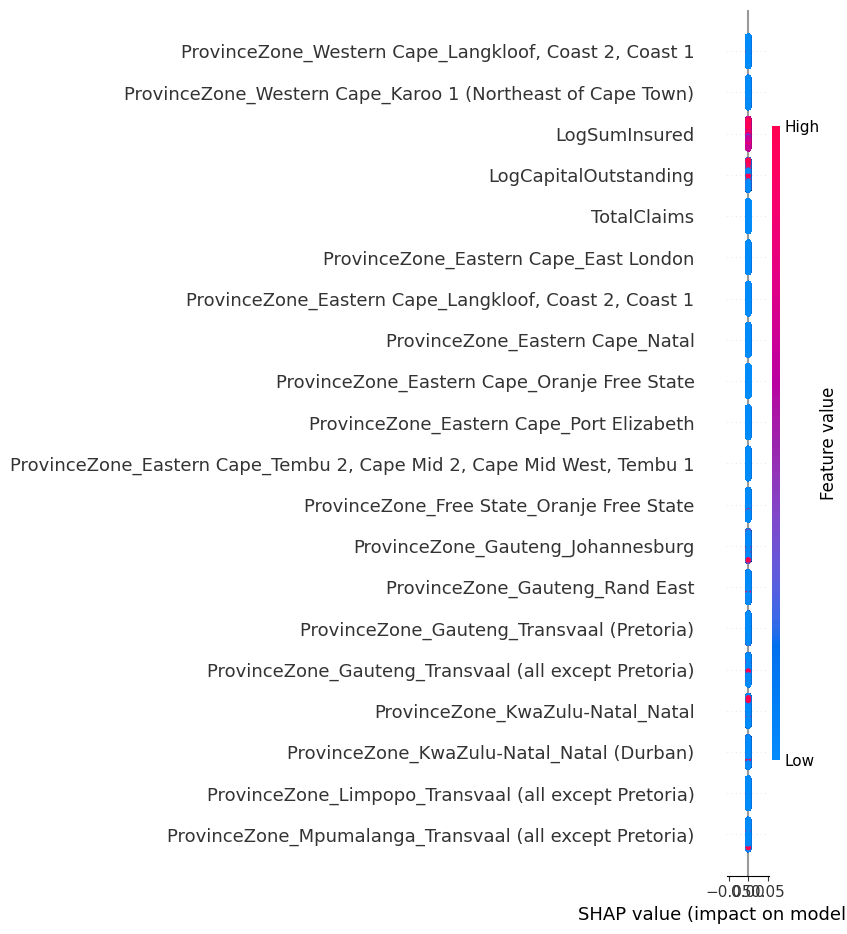

 96%|=================== | 193005/200020 [00:27<00:00]       

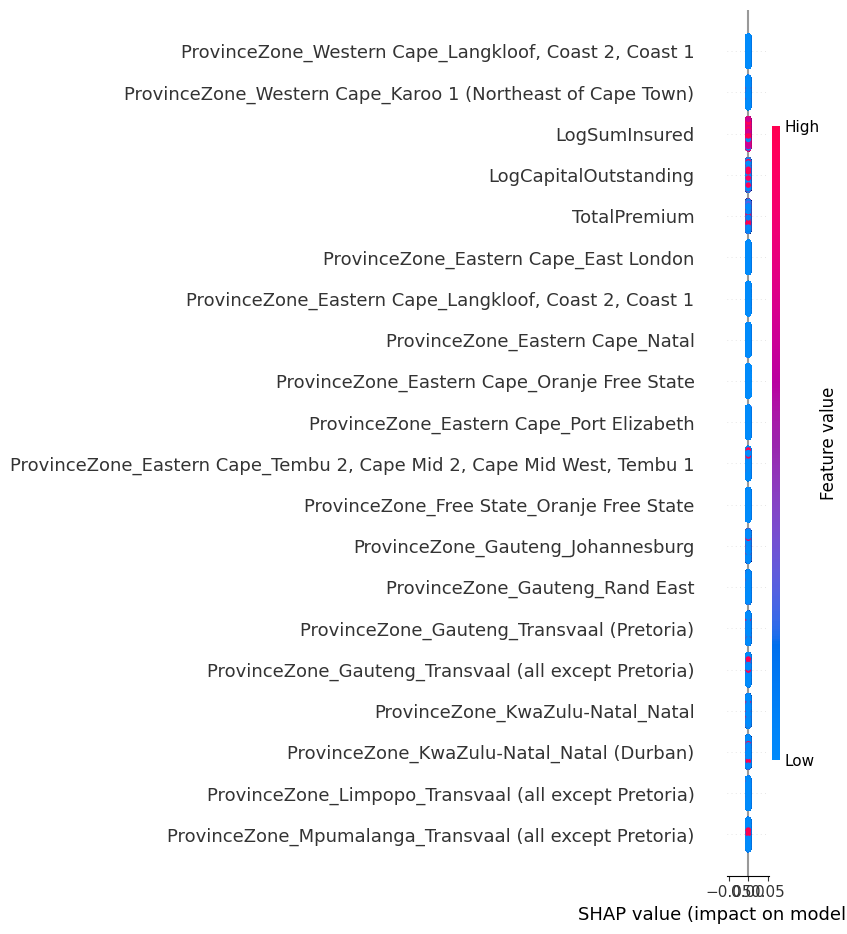

In [13]:
modeling.shap_analysis('XGBoost')

In [ ]:
# modeling.lime_analysis('Decision Tree')